In [129]:

import numpy as np

def generate_knapsack_problem(N, c, W):
    # Randomly generate values and weights for each item
    values = np.random.randint(1, 51, size=N)  # Values between 1 and 50
    weights = np.random.randint(1, 101, size=N)  # Weights between 1 and 100

    return values, weights, W, c

N = 200  # Example number of items
c = 10    # Maximum number of copies per item
max_weight_per_item = 120
W = max_weight_per_item * N * c * 0.3  # Maximum weight of the knapsack

values, weights, W, c = generate_knapsack_problem(N, c, W)


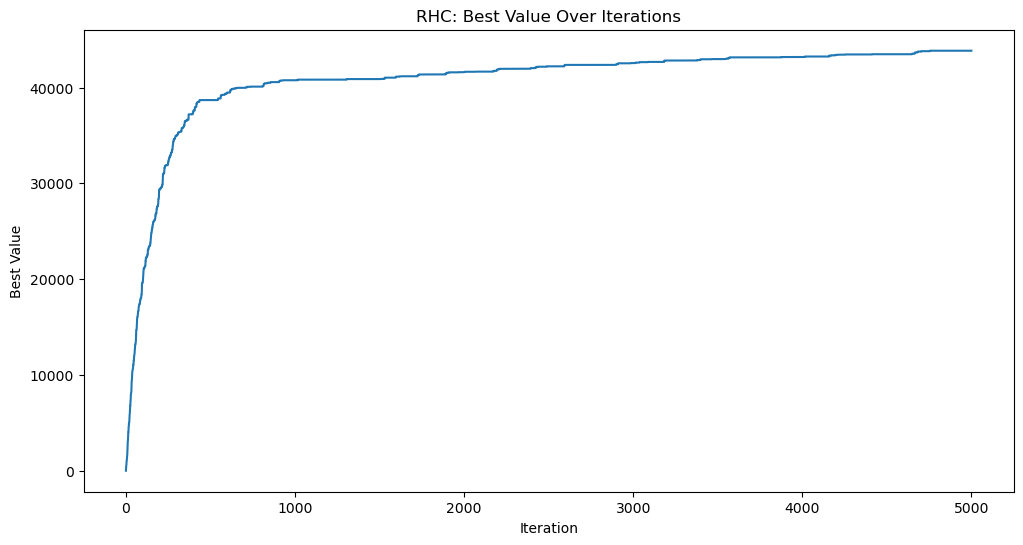

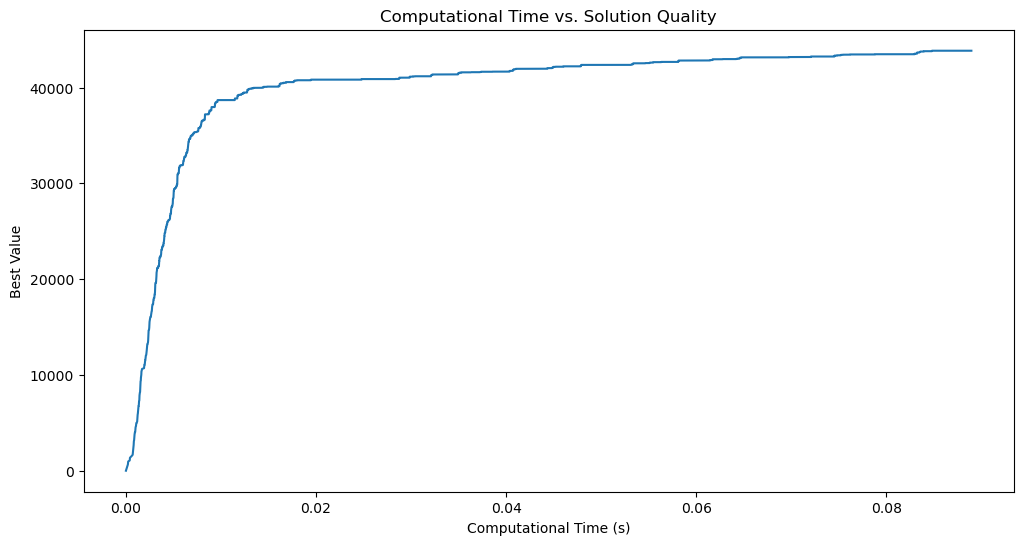

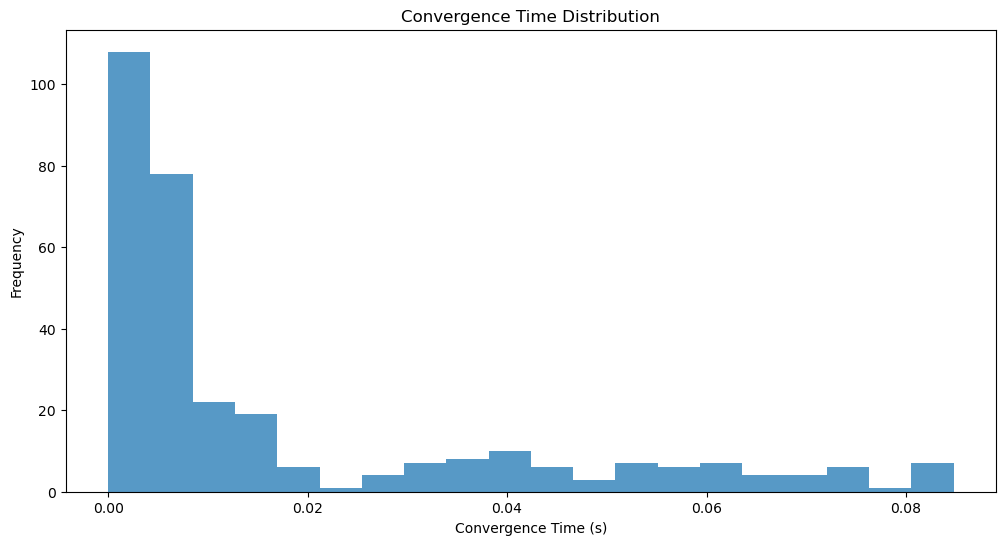

Best Solution (RHC): [ 1  6  6  5  8 10  8  9 10  0  4  7  1 10  0  5  1  9  4  8  8 10  0  7
 10  6  9 10  8 10  3  8  8  9 10 10  8 10  8 10  8  8  9 10  0  0  9  2
  8  8 10  8  7  9  3  6  8  9  9  9  4  4  5  9  9 10 10  8 10 10  2 10
 10 10  6 10 10  7  9 10 10  9 10  6  6  1  9 10  8 10  2 10  0  1  9  3
  3  5 10 10  6 10  8  8  0 10 10  9  3 10  8  0 10 10  8 10  5 10 10 10
 10 10 10 10  6  1 10 10 10 10  9 10  9  9 10 10 10 10  0 10  9 10  6  9
  0 10 10  9  6  9  9  0 10 10  8  0 10  3 10  6  3  2 10 10 10  9  8  4
  1 10  6  2  9 10  0  9 10 10 10  0  1  2  7 10  0  6 10 10  5  9  9  3
  7  2  0 10  4  6  7  6]
Best Value (RHC): 43840


In [137]:
import numpy as np
import matplotlib.pyplot as plt
import time

def generate_knapsack_problem(N, c, W):
    values = np.random.randint(1, 51, size=N)  # Values between 1 and 50
    weights = np.random.randint(1, 101, size=N)  # Weights between 1 and 100
    return values, weights, W, c

def rhc_knapsack(values, weights, W, c, iterations=5000):
    best_solution = np.zeros(len(values), dtype=int)
    best_value = np.dot(values, best_solution)
    fitness_over_time = [best_value]
    cumulative_time_log = [0]
    convergence_times = []

    for iteration in range(iterations):
        start_time = time.perf_counter()

        # Generate a neighbor solution by tweaking the current solution slightly
        neighbor = best_solution.copy()
        # Randomly add or remove a small number of items
        for _ in range(np.random.randint(1, 5)):  # Adjust the range for more gradual changes
            idx = np.random.randint(0, len(values))
            neighbor[idx] = np.random.randint(0, c+1)

        total_weight = np.dot(neighbor, weights)

        # Accept the neighbor if it is better and within the weight limit
        if total_weight <= W:
            total_value = np.dot(neighbor, values)
            if total_value > best_value:
                best_solution = neighbor
                best_value = total_value
                convergence_times.append(cumulative_time_log[-1])

        fitness_over_time.append(best_value)
        end_time = time.perf_counter()
        cumulative_time_log.append(cumulative_time_log[-1] + (end_time - start_time))

    # Fitness Function Over Iterations Plot
    plt.figure(figsize=(12, 6))
    plt.plot(fitness_over_time)
    plt.xlabel('Iteration')
    plt.ylabel('Best Value')
    plt.title('RHC: Best Value Over Iterations')
    plt.show()

    # Computational Time vs. Solution Quality Plot
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_time_log, fitness_over_time)
    plt.xlabel('Computational Time (s)')
    plt.ylabel('Best Value')
    plt.title('Computational Time vs. Solution Quality')
    plt.show()

    # Convergence Time Distribution Plot
    plt.figure(figsize=(12, 6))
    plt.hist(convergence_times, bins=20, alpha=0.75)
    plt.xlabel('Convergence Time (s)')
    plt.ylabel('Frequency')
    plt.title('Convergence Time Distribution')
    plt.show()

    return best_solution, best_value

# Problem setup
N = 200  # Number of items
c = 10   # Maximum number of copies per item
max_weight_per_item = 120
W = max_weight_per_item * N * c * 0.3  # Maximum weight of the knapsack

# Generate knapsack problem
values, weights, W, c = generate_knapsack_problem(N, c, W)

# Run the RHC algorithm
best_solution_rhc, best_value_rhc = rhc_knapsack(values, weights, W, c)

print(f"Best Solution (RHC): {best_solution_rhc}")
print(f"Best Value (RHC): {best_value_rhc}")


C:\Users\hoode\AppData\Local\Temp\ipykernel_3448\1697602663.py:39: RuntimeWarning: overflow encountered in divide
  np.random.rand() < np.exp((neighbor_value - current_value) / temp)):
C:\Users\hoode\AppData\Local\Temp\ipykernel_3448\1697602663.py:39: RuntimeWarning: divide by zero encountered in divide
  np.random.rand() < np.exp((neighbor_value - current_value) / temp)):
C:\Users\hoode\AppData\Local\Temp\ipykernel_3448\1697602663.py:39: RuntimeWarning: invalid value encountered in divide
  np.random.rand() < np.exp((neighbor_value - current_value) / temp)):


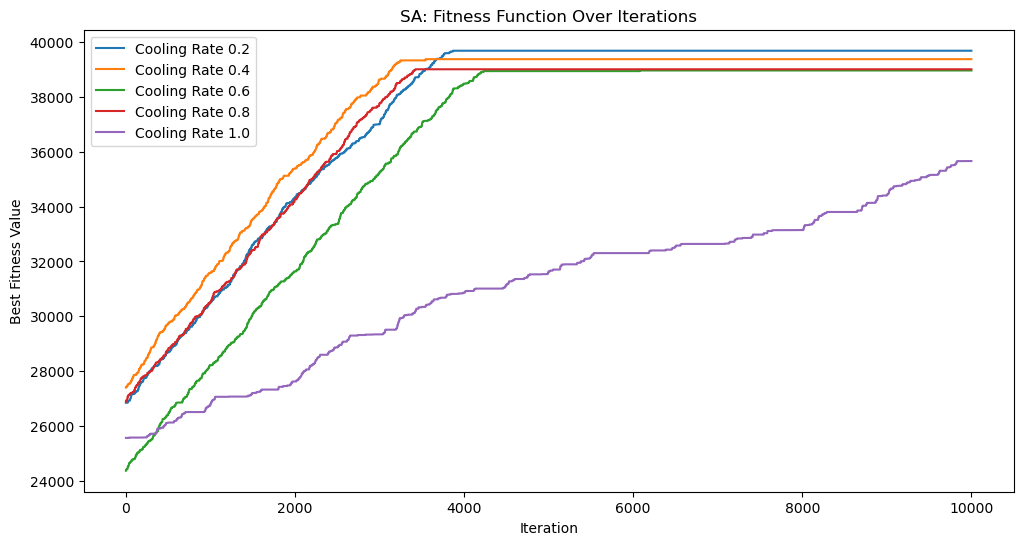

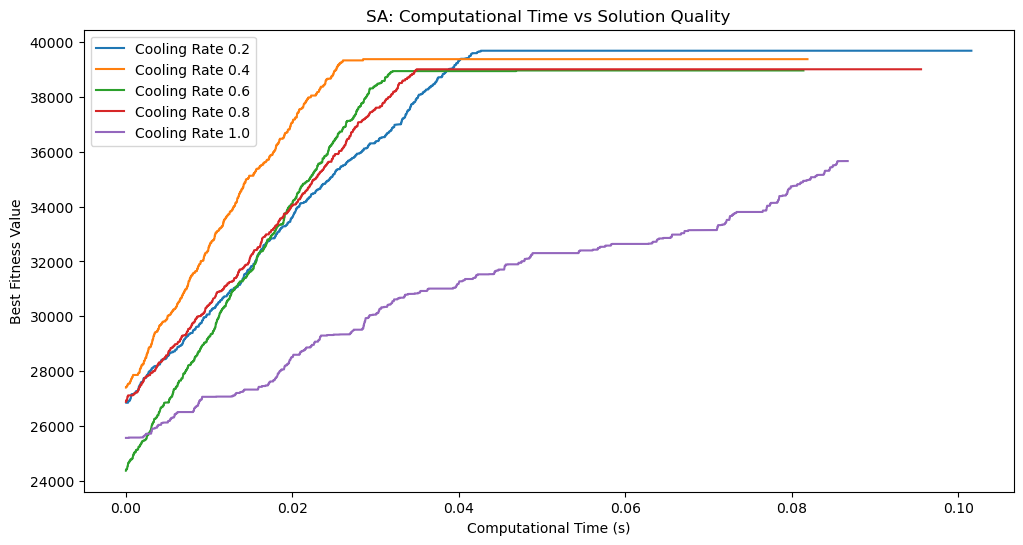

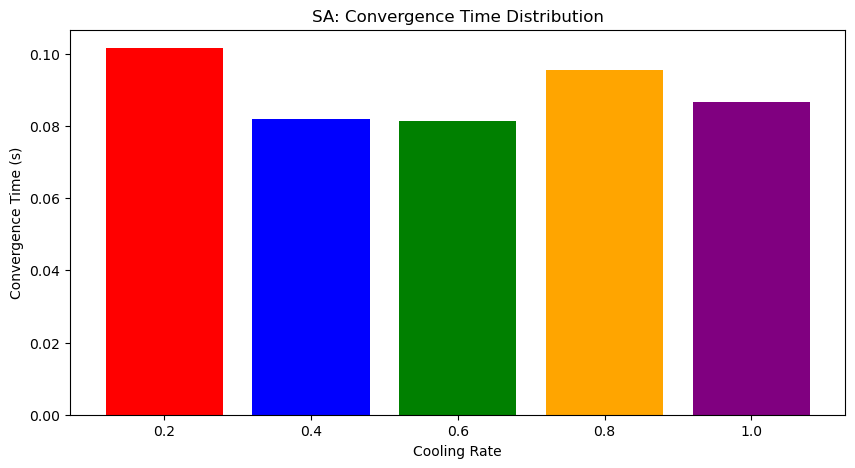

Cooling Rate 0.2: Best Value = 39690, Avg Time = 0.000017 s
Cooling Rate 0.4: Best Value = 39382, Avg Time = 0.000017 s
Cooling Rate 0.6: Best Value = 38969, Avg Time = 0.000017 s
Cooling Rate 0.8: Best Value = 39013, Avg Time = 0.000017 s
Cooling Rate 1.0: Best Value = 35664, Avg Time = 0.000017 s


In [153]:
import numpy as np
import matplotlib.pyplot as plt
import time


def sa_knapsack(values, weights, max_capacity, max_copies, iterations, initial_temp, cooling_rates):
    n_items = len(values)
    fitness_over_time = {cr: [] for cr in cooling_rates}
    time_quality_data = {cr: [] for cr in cooling_rates}
    convergence_time = {cr: None for cr in cooling_rates}
    
    for cooling_rate in cooling_rates:
        current_solution = np.random.randint(0, max_copies + 1, size=n_items)
        current_value = np.sum(current_solution * values)
        current_weight = np.sum(current_solution * weights)
        
        best_solution = np.copy(current_solution)
        best_value = current_value
        
        time_log = []
        temp = initial_temp
        for iteration in range(iterations):
            start_time = time.perf_counter()
            
                        # Generate a neighbor solution
            idx = np.random.randint(0, n_items)
            neighbor = current_solution.copy()
            change = np.random.randint(-1, 2)  # Change can be -1, 0, or 1
            neighbor[idx] = min(max_copies, max(0, neighbor[idx] + change))
            
            # Calculate neighbor's weight and value
            neighbor_weight = np.sum(neighbor * weights)
            neighbor_value = np.sum(neighbor * values)
            
            # Accept or reject the neighbor
            if neighbor_weight <= max_capacity and (neighbor_value > current_value or
                                                   np.random.rand() < np.exp((neighbor_value - current_value) / temp)):
                current_solution = neighbor
                current_value = neighbor_value
                current_weight = neighbor_weight
                
                # Update best solution found
                if current_value > best_value:
                    best_solution = current_solution.copy()
                    best_value = current_value
            
            fitness_over_time[cooling_rate].append(best_value)
            
            
            end_time = time.perf_counter()
            time_log.append(end_time - start_time)
            
            # Record the fitness value and the current cumulative time
            fitness_over_time[cooling_rate].append(best_value)
            time_quality_data[cooling_rate].append((sum(time_log), best_value))
            
            temp *= cooling_rate  # Cool down
        
        convergence_time[cooling_rate] = sum(time_log)

    avg_time_log = {cr: np.mean(time_log) for cr in cooling_rates}
    best_values = {cr: fitness_over_time[cr][-1] for cr in cooling_rates}

    return fitness_over_time, time_quality_data, avg_time_log, best_values, convergence_time

cooling_rates = [0.2, 0.4, 0.6, 0.8, 1.0]
fitness_over_time, time_quality_data, avg_time_log, best_values, convergence_time = sa_knapsack(values, weights, W, c, 5000, 100, cooling_rates)

# Plotting Fitness Function over Iterations for different cooling rates
plt.figure(figsize=(12, 6))
for cr, fitness in fitness_over_time.items():
    plt.plot(fitness, label=f'Cooling Rate {cr}')
plt.xlabel('Iteration')
plt.ylabel('Best Fitness Value')
plt.title('SA: Fitness Function Over Iterations')
plt.legend()
plt.show()

# Plotting Computational Time vs Solution Quality for different cooling rates
plt.figure(figsize=(12, 6))
for cr, data in time_quality_data.items():
    times, qualities = zip(*data)
    plt.plot(times, qualities, label=f'Cooling Rate {cr}')
plt.xlabel('Computational Time (s)')
plt.ylabel('Best Fitness Value')
plt.title('SA: Computational Time vs Solution Quality')
plt.legend()
plt.show()

# Plotting Convergence Time Distribution for different cooling rates
cooling_rates = list(convergence_time.keys())
times = [convergence_time[cr] for cr in cooling_rates]
colors = ['red', 'blue', 'green', 'orange', 'purple']  # List of colors for each bar

plt.figure(figsize=(10, 5))
bar_positions = np.arange(len(cooling_rates))
plt.bar(bar_positions, times, color=colors)

plt.xlabel('Cooling Rate')
plt.ylabel('Convergence Time (s)')
plt.title('SA: Convergence Time Distribution')
plt.xticks(bar_positions, [str(cr) for cr in cooling_rates])  # Set x-tick labels to cooling rates

plt.show()

# Printing the best value and the average computation time per iteration for each cooling rate
for cr in cooling_rates:
    print(f"Cooling Rate {cr}: Best Value = {best_values[cr]}, Avg Time = {avg_time_log[cr]:.6f} s")


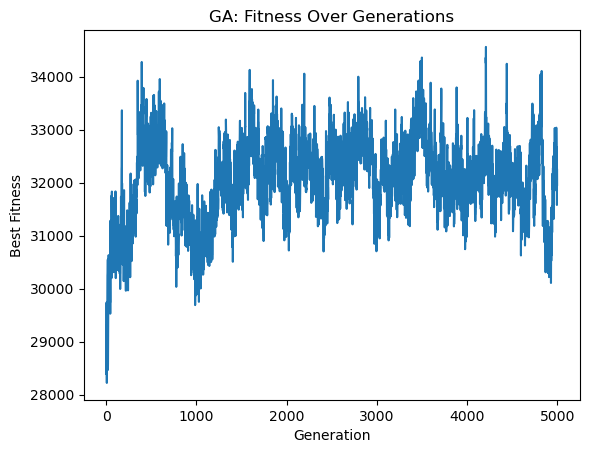

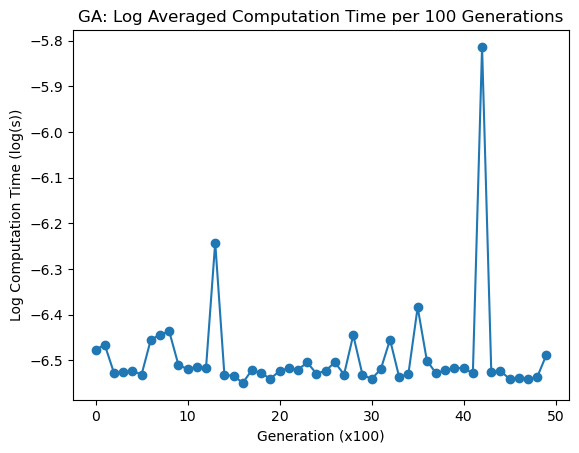

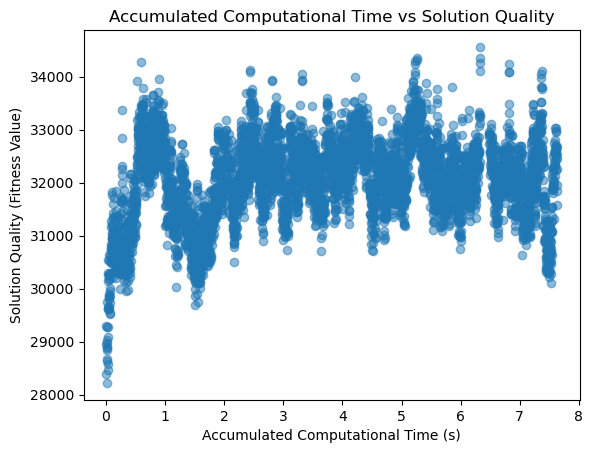

Best solution (GA): [ 9  9  8  9  3  1  5  9  7  5  0  3  7  9  5 10  7  9  7 10  8 10 10  9
  9  7  7  9  8  6  3  7  5  7  6 10 10  9  6  3 10  8  0 10  7  9  7  9
  9  2  7  4  1  5 10  4  2  4  0  8  2  7  4  2 10  7  1  5  0  2  7  3
 10  9  2  3  7  6  9 10  1  4  5 10  3  6  8  6 10 10 10  4  5  2  8  3
  7  6  9  8 10  8  3  6  3  4  9  8  2  3  8  1  1  0  8  2  9  7  8  6
  4  0  6  8  4  6  8  4  4  4  6  8 10  3  9  9  0  8  9  7  9  8 10 10
  7  9  4  6 10 10  2  6  9  9  9  9  9  4 10 10  9  3  5  8  4  7  6  7
 10  0  3  8  8  3  5 10  2  9  9  5  8  4 10  8  3  2  4  8  0  2  3  5
  0  5  9  5  9  0  4  6]
Best value (GA): 32790
Average computation time (GA): 0.0015 seconds


In [155]:
import numpy as np
import matplotlib.pyplot as plt
import time

def generate_knapsack_problem(N, c, W):
    values = np.random.randint(1, 51, size=N)
    weights = np.random.randint(1, 101, size=N)
    return values, weights, W, c

def genetic_algorithm_knapsack(values, weights, W, c, population_size, generations, mutation_rate, crossover_rate):
    n_items = len(values)
    def fitness(solution):
        total_value = np.dot(solution, values)
        total_weight = np.dot(solution, weights)
        return total_value if total_weight <= W else 0
    
    population = np.random.randint(0, c+1, (population_size, n_items))
    fitness_history = []
    time_log = []
    time_vs_quality = []  # Store time and quality for the new plot


    for generation in range(generations):
        start_time = time.perf_counter()
        fitness_values = np.array([fitness(individual) for individual in population])
        best_fitness = fitness_values.max()
        fitness_history.append(best_fitness)
        
        # Additional data for the computational time vs solution quality plot
        time_vs_quality.append((time.perf_counter() - start_time, best_fitness))
        
        parents_indices = np.random.choice(population_size, size=population_size, replace=True, p=fitness_values/fitness_values.sum())
        parents = population[parents_indices]
        
        children = []
        for i in range(0, parents.shape[0], 2):
            parent1, parent2 = parents[i], parents[i+1]
            if np.random.rand() < crossover_rate:
                crossover_point = np.random.randint(1, n_items-1)
                child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
                child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
            else:
                child1, child2 = parent1, parent2
            children.extend([child1, child2])
        children = np.array(children)
        
        mutation_indices = np.random.rand(children.shape[0], children.shape[1]) < mutation_rate
        children[mutation_indices] = np.random.randint(0, c+1, np.sum(mutation_indices))
        
        population = children
        
        end_time = time.perf_counter()
        time_log.append(end_time - start_time)

    final_fitness_values = np.array([fitness(individual) for individual in population])
    best_solution = population[final_fitness_values.argmax()]
    best_value = final_fitness_values.max()

    # Plot fitness over generations
    plt.plot(fitness_history)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('GA: Fitness Over Generations')
    plt.show()

    # Plot average computation time per generation
    averaged_time_log = [np.mean(time_log[i:i+100]) for i in range(0, len(time_log), 100)]
    plt.plot(np.log(np.array(averaged_time_log) + 1e-9), marker='o', linestyle='-')
    plt.xlabel('Generation (x100)')
    plt.ylabel('Log Computation Time (log(s))')
    plt.title('GA: Log Averaged Computation Time per 100 Generations')
    plt.show()

    # Accumulate the computational time for plotting
    accumulated_time = np.cumsum(time_log)

# Computational time vs solution quality plot
    accumulated_times, qualities = zip(*[(sum(time_log[:i+1]), q) for i, q in enumerate(fitness_history)])
    plt.scatter(accumulated_times, qualities, alpha=0.5)  # Alpha added for transparency
    plt.xlabel('Accumulated Computational Time (s)')
    plt.ylabel('Solution Quality (Fitness Value)')
    plt.title('Accumulated Computational Time vs Solution Quality')
    plt.show()
    
    return best_solution, best_value, np.mean(time_log)

N = 200
c = 10
max_weight_per_item = 120
W = max_weight_per_item * N * c * 0.3

values, weights, W, c = generate_knapsack_problem(N, c, W)

best_solution_ga, best_value_ga, avg_time_ga = genetic_algorithm_knapsack(
    values, weights, W, c,
    population_size=N, generations=5000,
    mutation_rate=0.01, crossover_rate=0.7
)
print(f"Best solution (GA): {best_solution_ga}\nBest value (GA): {best_value_ga}\nAverage computation time (GA): {avg_time_ga:.4f} seconds")


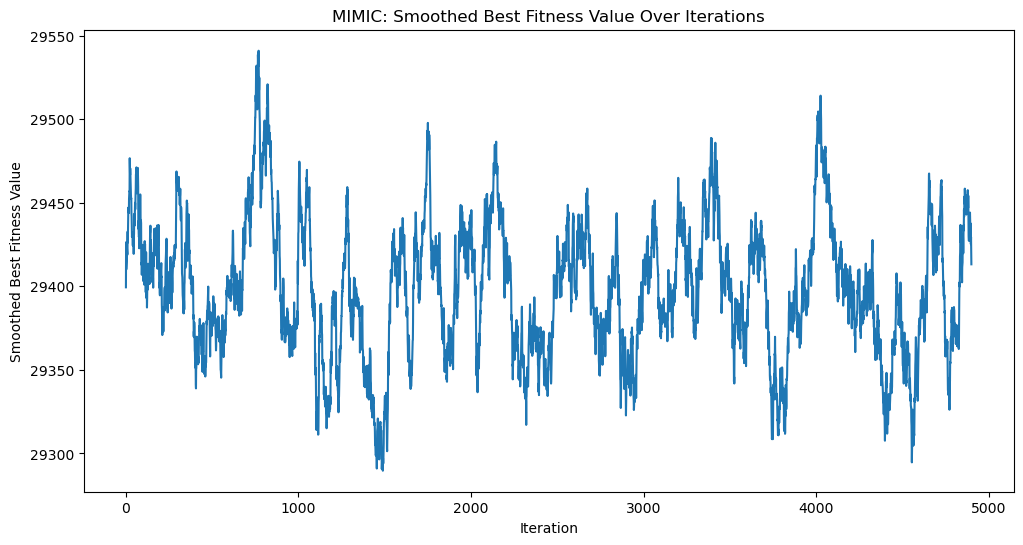

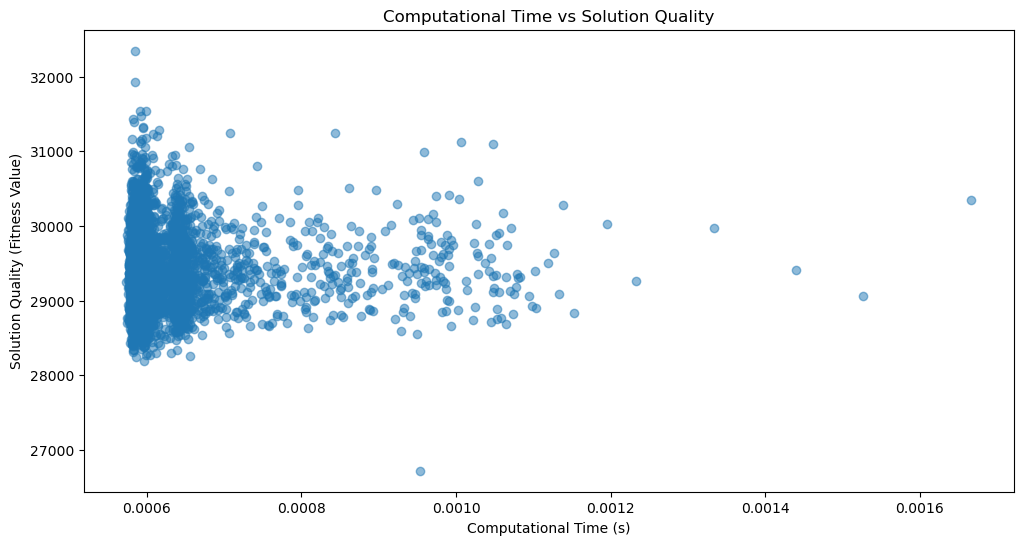

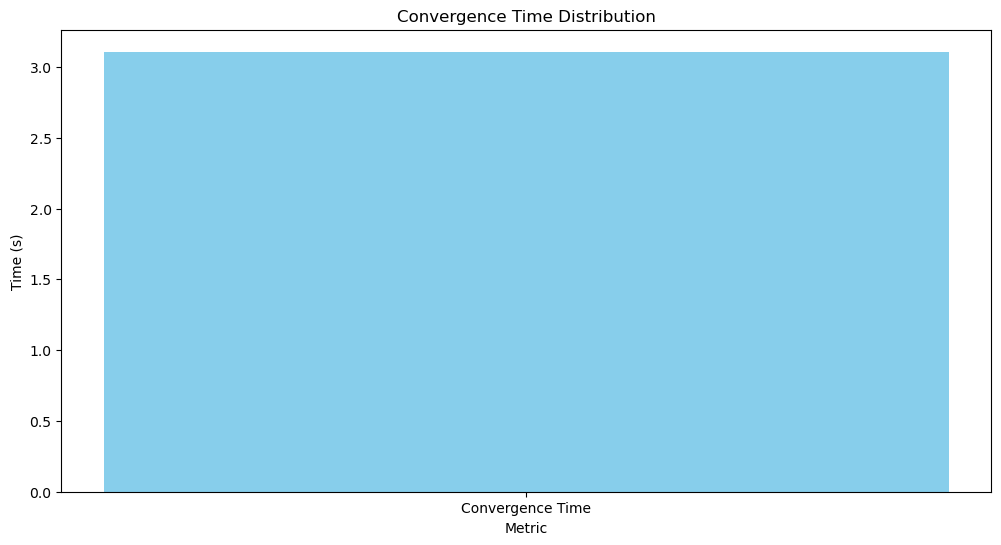

Best solution (MIMIC): [ 5  9  8  7 10 10  1  3  2 10  8  5 10  1  9  9  8  6  2  3  8 10  5  3
  9  2  7  9  6 10  4  9  2 10 10  1 10  5 10  2  5  7 10  2  6  2  5  3
  1 10  9  8  8  7  2  3  1  8  5  6  7  2  9  2 10  5  8  2  4  8 10  5
  2  1  8  3  8  1  1  9  3  3 10  2  4  7  8  4  6  4  2 10  4  5  4  3
  1  1  5  4  8  2  1  7  2  7 10  9  3 10 10  3  2  9 10  9  6 10  1  2
  9  8  6  7 10  1  4  5  2  4  8  9  7  4  6  8  3  3  5  5  4  7  2  5
  5 10  5  3  4  2  4  6  6  2  3  1  3  1  7 10  9  3  2  1  2  1  1  1
  2  3  8  6  6  1 10  1  1  8  7  3  4  5  2  8 10  4  7  2 10  8  3  6
  8  9 10  6  1  2  7  9]
Best value (MIMIC): 28542
Average computation time per iteration: 0.000622 seconds


In [165]:
import numpy as np
import matplotlib.pyplot as plt
import time

def generate_knapsack_problem(N, c, W):
    values = np.random.randint(1, 51, size=N)
    weights = np.random.randint(1, 101, size=N)
    return values, weights, W, c

def mimic_knapsack(values, weights, W, c, population_size, iterations):
    n_items = len(values)
    population = np.random.randint(0, c+1, (population_size, n_items))
    fitness_history = []
    time_log = []
    time_quality_data = []

    for iteration in range(iterations):
        start_time = time.perf_counter()

        weights_sum = np.dot(population, weights)
        values_sum = np.dot(population, values)
        fitness = np.where(weights_sum <= W, values_sum, 0)

        sorted_indices = np.argsort(fitness)[::-1]
        population = population[sorted_indices]

        selected = population[:int(population_size * 0.5)]
        probabilities = np.mean(selected, axis=0)

        new_population = np.random.rand(population_size, n_items) < probabilities
        new_population = new_population.astype(int) * np.random.randint(1, c+1, size=(population_size, n_items))

        for i in range(population_size):
            while np.dot(new_population[i], weights) > W:
                item_to_remove = np.random.choice(np.where(new_population[i] > 0)[0])
                new_population[i][item_to_remove] -= 1

        population = new_population
        current_best_value = np.max(fitness)
        fitness_history.append(current_best_value)
        time_quality_data.append((time.perf_counter() - start_time, current_best_value))

    best_index = np.argmax(fitness)
    best_solution = population[best_index]
    best_value = fitness[best_index]

    # Plot the smoothed fitness history
    plt.figure(figsize=(12, 6))
    smoothed_fitness = np.convolve(fitness_history, np.ones(100)/100, mode='valid')
    plt.plot(smoothed_fitness)
    plt.xlabel('Iteration')
    plt.ylabel('Smoothed Best Fitness Value')
    plt.title('MIMIC: Smoothed Best Fitness Value Over Iterations')
    plt.show()

    # Plot Computational Time vs Solution Quality
    times, qualities = zip(*time_quality_data)
    plt.figure(figsize=(12, 6))
    plt.scatter(times, qualities, alpha=0.5)
    plt.xlabel('Computational Time (s)')
    plt.ylabel('Solution Quality (Fitness Value)')
    plt.title('Computational Time vs Solution Quality')
    plt.show()

    # Plot Convergence Time Distribution
    convergence_time = sum(times)
    plt.figure(figsize=(12, 6))
    plt.bar('Convergence Time', convergence_time, color='skyblue')
    plt.xlabel('Metric')
    plt.ylabel('Time (s)')
    plt.title('Convergence Time Distribution')
    plt.show()

    return best_solution, best_value, np.mean(times)

# Problem parameters
N = 200
c = 10
max_weight_per_item = 120
W = max_weight_per_item * N * c * 0.3

# Generate the knapsack problem
values, weights, W, c = generate_knapsack_problem(N, c, W)

# Run the MIMIC algorithm
best_solution_mimic, best_value_mimic, avg_time_mimic = mimic_knapsack(
    values, weights, W, c, population_size=100, iterations=5000
)

print(f"Best solution (MIMIC): {best_solution_mimic}\nBest value (MIMIC): {best_value_mimic}\nAverage computation time per iteration: {avg_time_mimic:.6f} seconds")
